In [1]:
import numpy as np
import pandas as pd

train = pd.read_csv('./train.csv')
train.columns = train.columns.str.lower()

# train.isna().sum()[train.isna().sum()>0].sort_values(ascending=False)
# cabin       687
# age         177
# embarked      2

# train.select_dtypes('object').columns
# ['name', 'sex', 'ticket', 'cabin', 'embarked']

# train['sex'].unique()
# ['male', 'female']

# train['embarked'].unique()
# ['S', 'C', 'Q', nan]

# train.columns
# 'passengerid', 'name', ,'cabin', 'ticket', 
# 'pclass', 'sex'(0,1), 'age', 'sibsp', 'parch', 'fare', 'embarked'(0,1,2)
# 'survived'

train['age'] = train['age'].fillna(train['age'].mean())
train['embarked'] = train['embarked'].fillna(train['embarked'].mode().values[0])
train['embarked'] = train['embarked'].replace(['S', 'C', 'Q'], [0, 1, 2])
train['sex'] = train['sex'].replace(['male', 'female'], [0, 1])
train = train.drop(['passengerid', 'name', 'cabin', 'ticket'], axis=1)
y = train['survived']
X = train.drop('survived', axis=1)

from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0, test_size=0.3)
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(X_train, y_train)
y_pred = dtc.predict(X_test)
acc_scr = accuracy_score(y_test, y_pred)
acc_scr
# 0.8059701492537313

0.8059701492537313

In [2]:
import time
import re
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder

import warnings
warnings.filterwarnings(action='ignore')

In [3]:
train = pd.read_csv('./train.csv')
train.columns = train.columns.str.lower()
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   passengerid  891 non-null    int64  
 1   survived     891 non-null    int64  
 2   pclass       891 non-null    int64  
 3   name         891 non-null    object 
 4   sex          891 non-null    object 
 5   age          714 non-null    float64
 6   sibsp        891 non-null    int64  
 7   parch        891 non-null    int64  
 8   ticket       891 non-null    object 
 9   fare         891 non-null    float64
 10  cabin        204 non-null    object 
 11  embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
train.isna().sum()[train.isna().sum()>0].sort_values(ascending=False)

cabin       687
age         177
embarked      2
dtype: int64

In [185]:
train.select_dtypes('object').columns

Index(['name', 'sex', 'ticket', 'cabin', 'embarked', 'title'], dtype='object')

In [6]:
train['title'] = train['name'].str.extract('\s(\w+)[.]\s')
train['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Don', 'Rev', 'Dr', 'Mme', 'Ms',
       'Major', 'Lady', 'Sir', 'Mlle', 'Col', 'Capt', 'Countess',
       'Jonkheer'], dtype=object)

In [7]:
train['title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Capt          1
Ms            1
Sir           1
Lady          1
Mme           1
Don           1
Jonkheer      1
Name: title, dtype: int64

In [8]:
to_Mr = ['Don', 'Jonkheer', 'Major', 'Col', 'Capt', 'Sir']
to_Mrs = ['Countess', 'Mme']
to_Miss = ['Mlle', 'Ms', 'Lady']
train['title'] = train['title'].replace(to_Mr, ['Mr']*len(to_Mr))
train['title'] = train['title'].replace(to_Mrs, ['Mrs']*len(to_Mrs))
train['title'] = train['title'].replace(to_Miss, ['Miss']*len(to_Miss))
train['title'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Rev', 'Dr'], dtype=object)

In [59]:
title_age_mean = train.groupby('title')['age'].transform('mean')
title_age_mean

0      32.740148
1      35.763636
2      22.020000
3      35.763636
4      32.740148
         ...    
886    43.166667
887    22.020000
888    22.020000
889    32.740148
890    32.740148
Name: age, Length: 891, dtype: float64

In [10]:
train['age'] = train['age'].fillna( title_age_mean )
train['age'].isna().sum()

0

In [43]:
embarked_mode = train['embarked'].mode().values[0]
embarked_mode

'S'

In [44]:
train['embarked'] = train['embarked'].fillna( embarked_top )
train['embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [52]:
train['cabin'].str[0].unique()

array([nan, 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [53]:
train['cabin'].apply(lambda x: 'O' if x is np.nan else x[0])

0      O
1      C
2      O
3      C
4      O
      ..
886    O
887    B
888    O
889    C
890    O
Name: cabin, Length: 891, dtype: object

In [54]:
train['cabin'] = train['cabin'].apply(lambda x: 'O' if x is np.nan else x[0])
train['cabin'].unique()

array(['O', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [60]:
train.groupby('pclass')['survived'].mean()

pclass
1    0.629630
2    0.472826
3    0.242363
Name: survived, dtype: float64

In [61]:
train.pivot_table(index=['pclass'], values=['survived'])

,survived
pclass,
1,0.629630
2,0.472826
3,0.242363


In [62]:
pd.crosstab(index=[train['pclass']], columns=[train['survived']])

survived,0,1
pclass,,
1,80,136
2,97,87
3,372,119


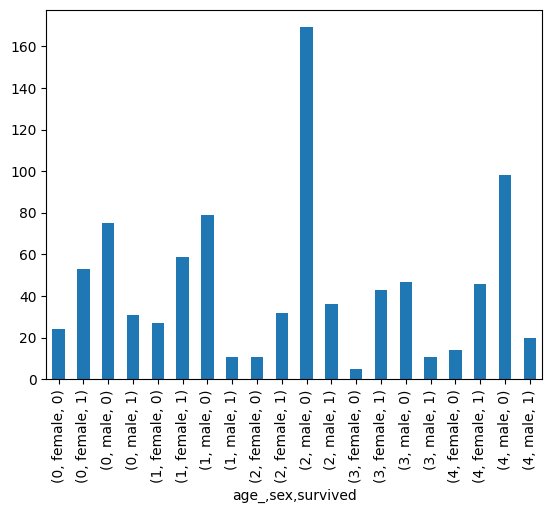

In [155]:
bins=5
age_cut_series = pd.qcut(train['age'], bins, labels=[n for n in range(bins)])
train['age_'] = age_cut_series
train[['age_','sex', 'survived']].value_counts().sort_index().plot(kind='bar')
plt.show()

In [201]:
x = pd.get_dummies(train[['pclass', 'age_', 'sex', 'cabin', 'embarked', 'title']])
y = train['survived']

x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=0, test_size=0.2)
dtc = DecisionTreeClassifier(random_state=0)
dtc.fit(x_train, y_train)
y_pred = dtc.predict(x_test)
accuracy_score(y_test, y_pred)

0.8044692737430168

In [245]:
t = pd.read_csv('./train.csv')
t.loc[t['Embarked'].isna()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


In [243]:
t[t['Embarked'].isna().values==True]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN
